In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

## TPOTClassifier

In [2]:
wine = pd.read_csv('wine.csv', names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N'])

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       178 non-null    float64
 1   B       178 non-null    float64
 2   C       178 non-null    float64
 3   D       178 non-null    float64
 4   E       178 non-null    int64  
 5   F       178 non-null    float64
 6   G       178 non-null    float64
 7   H       178 non-null    float64
 8   I       178 non-null    float64
 9   J       178 non-null    float64
 10  K       178 non-null    float64
 11  L       178 non-null    float64
 12  M       178 non-null    int64  
 13  N       178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
x = wine.drop('N', axis=1)
y = wine['N']

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 101)

In [6]:
tpot = TPOTClassifier(subsample = 0.7, verbosity = 2, warm_start = True, early_stop = 3)

In [7]:
tpot.fit(xtrain, ytrain)


Generation 1 - Current best internal CV score: 1.0
Generation 2 - Current best internal CV score: 1.0
Generation 3 - Current best internal CV score: 1.0

TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=2, max_features=0.3, min_samples_leaf=7, min_samples_split=20, n_estimators=100, subsample=0.3)


TPOTClassifier(early_stop=3,
               log_file=<ipykernel.iostream.OutStream object at 0x10d231ed0>,
               subsample=0.7, verbosity=2, warm_start=True)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
pred1 = tpot.predict(xtest)

In [11]:
confusion_matrix(pred1, ytest)

array([[19,  1,  0],
       [ 0, 21,  0],
       [ 0,  0, 13]])

In [12]:
print(classification_report(pred1, ytest))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        20
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



## Latihan 1

In [23]:
from sklearn.datasets import load_iris

In [24]:
iris = load_iris()

In [25]:
x = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
y = pd.Series(iris['target'])

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [27]:
tpot_iris = TPOTClassifier(subsample = 0.7, verbosity = 2, warm_start = True, max_time_mins = 2)

In [28]:
tpot_iris.fit(xtrain, ytrain)


Generation 1 - Current best internal CV score: 0.9723809523809525
2.01 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LogisticRegression(input_matrix, C=15.0, dual=False, penalty=l2)


TPOTClassifier(log_file=<ipykernel.iostream.OutStream object at 0x10d231ed0>,
               max_time_mins=2, subsample=0.7, verbosity=2, warm_start=True)

In [29]:
pred2 = tpot_iris.predict(xtest)

In [30]:
confusion_matrix(pred2, ytest)

array([[13,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 12]])

In [31]:
print(classification_report(pred2, ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      1.00      0.97        19
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



## Latihan 2

In [32]:
titanic = sns.load_dataset('titanic')

In [33]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
x = titanic[['pclass','age','sibsp','fare']]
y = titanic['survived']

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [42]:
tpot_tit = TPOTClassifier(subsample = 0.7, verbosity = 2, warm_start = True, early_stop = 1)

In [43]:
tpot_tit.fit(xtrain, ytrain)

Imputing missing values in feature set



Generation 1 - Current best internal CV score: 0.7408568443051202
Generation 2 - Current best internal CV score: 0.7408568443051202
Generation 3 - Current best internal CV score: 0.7477272727272727
Generation 4 - Current best internal CV score: 0.7477533960292582
Generation 5 - Current best internal CV score: 0.7499999999999999
Generation 6 - Current best internal CV score: 0.7499999999999999
The optimized pipeline was not improved after evaluating 1 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: XGBClassifier(BernoulliNB(ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.05, min_samples_leaf=12, min_samples_split=19, n_estimators=100), alpha=0.001, fit_prior=True), learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=100, nthread=1, subsample=0.3)


TPOTClassifier(early_stop=1,
               log_file=<ipykernel.iostream.OutStream object at 0x10d231ed0>,
               subsample=0.7, verbosity=2, warm_start=True)

In [44]:
pred3 = tpot_tit.predict(xtest)

Imputing missing values in feature set


In [45]:
confusion_matrix(pred3, ytest)

array([[129,  58],
       [ 25,  56]])

In [46]:
print(classification_report(pred3, ytest))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76       187
           1       0.49      0.69      0.57        81

    accuracy                           0.69       268
   macro avg       0.66      0.69      0.67       268
weighted avg       0.73      0.69      0.70       268



## Principal Component Analysis (PCA)

- digunakan untuk regresi dan clustering
- untuk menghilangkan korelasi antar kolom (features)
- menghindari terjadinya multikolonieritas

#### data awal -> transform -> bentuk komponen -> memasukkan nilai transform data awal untuk menjadi nilai dari komponennya

In [48]:
from sklearn.datasets import load_breast_cancer

In [51]:
cancer = load_breast_cancer()

In [52]:
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])

In [54]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

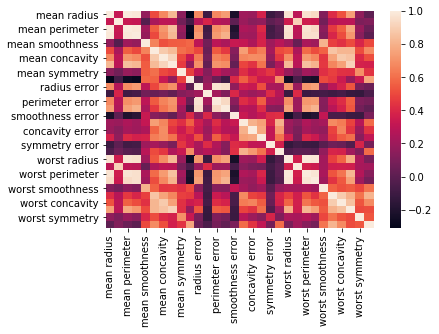

In [57]:
sns.heatmap(df.corr())

### Standarisasi

In [145]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
scaler.fit(df)

StandardScaler()

In [67]:
dft = scaler.transform(df)

In [68]:
dft

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [149]:
from sklearn.decomposition import PCA

In [72]:
# n_components = jumlah reduksi data (feature)
pca = PCA(n_components = 2)

In [73]:
pca.fit(dft)

PCA(n_components=2)

In [74]:
xpca= pca.transform(dft)

In [75]:
xpca.shape

(569, 2)

In [76]:
dft.shape

(569, 30)

In [78]:
dfpca = pd.DataFrame(xpca, columns = ['PC1', 'PC2'])
dfpca['target'] = cancer['target']

In [79]:
dfpca.head()

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


In [80]:
# nilai dari koefisien PC
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [82]:
dfcomp = pd.DataFrame(pca.components_, columns = cancer['feature_names'])

In [83]:
dfcomp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


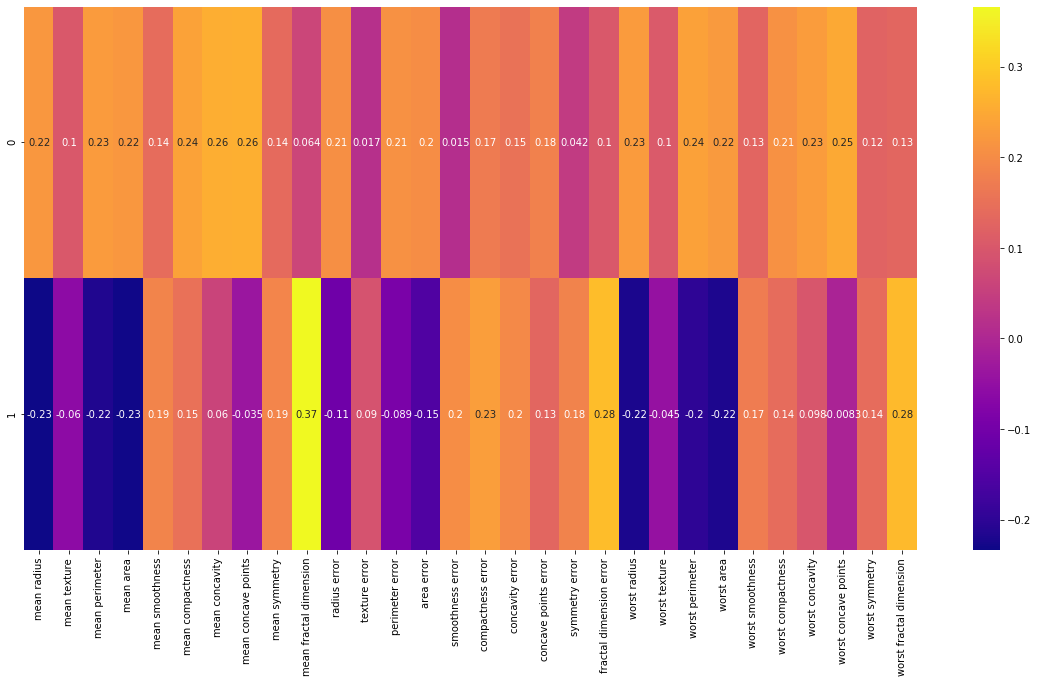

In [86]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcomp, cmap = 'plasma', annot=True)

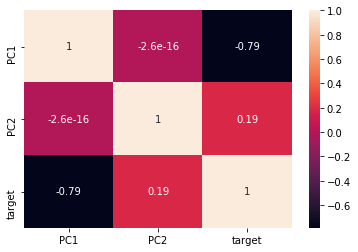

In [89]:
sns.heatmap(dfpca.corr(), annot = True)

## Latihan 3

In [158]:
data = pd.read_csv('fraud.csv')

In [159]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [160]:
import random
idx_sampel = random.sample(range(6362619),4000)
data = data.iloc[idx_sampel]
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5884041,403,TRANSFER,89692.03,C1491134194,0.00,0.00,C188177383,99371.41,189063.45,0,0
1129385,131,CASH_IN,25473.30,C1060653754,5753367.81,5778841.11,C542934513,8037455.68,8011982.38,0,0
1004200,46,PAYMENT,10796.62,C2122174959,498518.00,487721.38,M1246584965,0.00,0.00,0,0
5819329,401,TRANSFER,29432.21,C606008480,0.00,0.00,C1731387988,8039983.55,8069415.77,0,0
1481847,141,PAYMENT,12985.90,C1004745148,0.00,0.00,M487671042,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5171968,358,CASH_OUT,236643.89,C1383135257,120.00,0.00,C1752143985,2055466.84,2292110.73,0,0
3621287,274,CASH_IN,156619.94,C1444894183,6741489.18,6898109.11,C1721439071,4849543.38,4692923.44,0,0
2099056,182,CASH_OUT,55594.30,C540978260,0.00,0.00,C313410220,3126180.68,3181774.99,0,0
4843989,347,CASH_IN,58913.41,C1651852556,5408064.65,5466978.06,C720429982,219832.22,160918.81,0,0


In [161]:
data.drop(['nameOrig','nameDest','type'],axis=1,inplace=True)

In [162]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5884041,403,89692.03,0.00,0.00,99371.41,189063.45,0,0
1129385,131,25473.30,5753367.81,5778841.11,8037455.68,8011982.38,0,0
1004200,46,10796.62,498518.00,487721.38,0.00,0.00,0,0
5819329,401,29432.21,0.00,0.00,8039983.55,8069415.77,0,0
1481847,141,12985.90,0.00,0.00,0.00,0.00,0,0


In [163]:
x = data.drop('isFraud',axis = 1)
y = data['isFraud']

In [186]:
y.value_counts()

0    3996
1       4
Name: isFraud, dtype: int64

In [164]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 101)

In [177]:
tpot_data = TPOTClassifier(subsample = 0.7, verbosity = 2, warm_start = True, max_time_mins = 1)

In [178]:
tpot_data.fit(xtrain, ytrain)


1.01 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: MLPClassifier(RobustScaler(input_matrix), alpha=0.01, learning_rate_init=0.01)


TPOTClassifier(log_file=<ipykernel.iostream.OutStream object at 0x10d231ed0>,
               max_time_mins=1, subsample=0.7, verbosity=2, warm_start=True)

In [179]:
pred_data = tpot_data.predict(xtest)

In [180]:
confusion_matrix(pred_data, ytest)

array([[1199,    0],
       [   0,    1]])

In [181]:
print(classification_report(pred_data, ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1199
           1       1.00      1.00      1.00         1

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



## Latihan 4

In [139]:
from sklearn.datasets import load_boston

In [140]:
boston = load_boston()

In [142]:
dfb = pd.DataFrame(boston['data'], columns = boston['feature_names'])

In [143]:
dfb.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [144]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


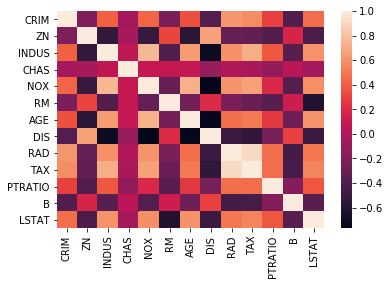

In [185]:
sns.heatmap(dfb.corr())

In [146]:
scaler = StandardScaler()

In [147]:
scaler.fit(dfb)

StandardScaler()

In [148]:
dfbt = scaler.transform(dfb)

In [150]:
pca = PCA(n_components = 2)

In [151]:
pca.fit(dfb)

PCA(n_components=2)

In [152]:
xpca  = pca.transform(dfb)

In [153]:
dfpca = pd.DataFrame(xpca, columns = ['PC1', 'PC2'])
dfpca['target'] = boston['target']

In [184]:
dfpca

,PC1,PC2,target
0,-119.818843,-5.560056,24.0
1,-168.890155,10.116209,21.6
2,-169.311707,14.080532,34.7
3,-190.230642,18.302463,33.4
4,-190.133451,16.097947,36.2
...,...,...,...
501,-138.697933,5.781485,22.4
502,-139.504439,1.039389,20.6
503,-138.387163,0.938092,23.9
504,-137.505173,4.251825,22.0


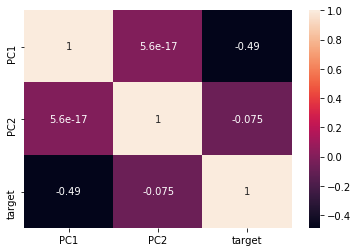

In [183]:
sns.heatmap(dfpca.corr(), annot = True)